In [3]:
# Load the database and show some data

import pandas as pd

Data_file = pd.read_csv('Auto Sales data.csv')
print(Data_file.head())

   QUANTITYORDERED  PRICEEACH    SALES   ORDERDATE COUNTRY DEALSIZE
0             30.0      95.70  2871.00  24/02/2018     USA    Small
1             34.0      81.35  2765.90    7/5/2018  France    Small
2             41.0      94.74  3884.34    1/7/2018  France   Medium
3             45.0      83.26  3746.70  25/08/2018     USA   Medium
4             36.0      96.66  3479.76  28/10/2018     NaN   Medium


In [17]:
# Show Data info
print(Data_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2735 non-null   float64       
 1   PRICEEACH        2690 non-null   float64       
 2   SALES            2702 non-null   float64       
 3   ORDERDATE        2690 non-null   datetime64[ns]
 4   COUNTRY          2686 non-null   object        
 5   DEALSIZE         2723 non-null   object        
 6   Month            2690 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 150.4+ KB
None


In [18]:
# Cleaning data for empty raw, wrong format, duplicate data, and show info after all operations
Data_file.dropna(inplace=True)

Data_file['ORDERDATE'] = pd.to_datetime(Data_file['ORDERDATE'], format='%d/%m/%Y', errors='coerce')


Data_file.dropna(subset=["ORDERDATE"], inplace=True)

Data_file.drop_duplicates(inplace = True)

print(Data_file.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2492 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2492 non-null   float64       
 1   PRICEEACH        2492 non-null   float64       
 2   SALES            2492 non-null   float64       
 3   ORDERDATE        2492 non-null   datetime64[ns]
 4   COUNTRY          2492 non-null   object        
 5   DEALSIZE         2492 non-null   object        
 6   Month            2492 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 155.8+ KB
None


In [19]:
# The relationship between the columns
print(Data_file.corr(numeric_only=True))

                 QUANTITYORDERED  PRICEEACH     SALES     Month
QUANTITYORDERED         1.000000   0.018692  0.558082 -0.042781
PRICEEACH               0.018692   1.000000  0.810039  0.020403
SALES                   0.558082   0.810039  1.000000 -0.011559
Month                  -0.042781   0.020403 -0.011559  1.000000


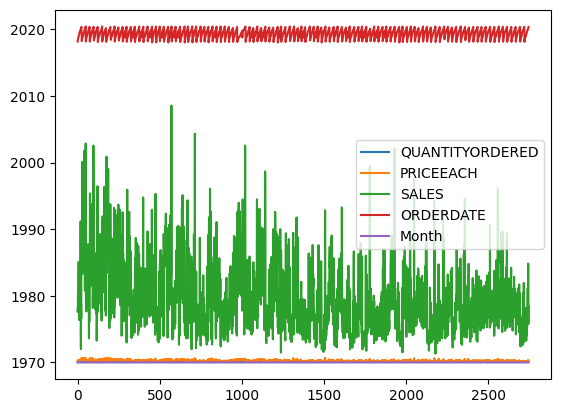

In [20]:
# visualize DataFrame using matplotlib
import matplotlib.pyplot as plt

Data_file.plot()
plt.show()

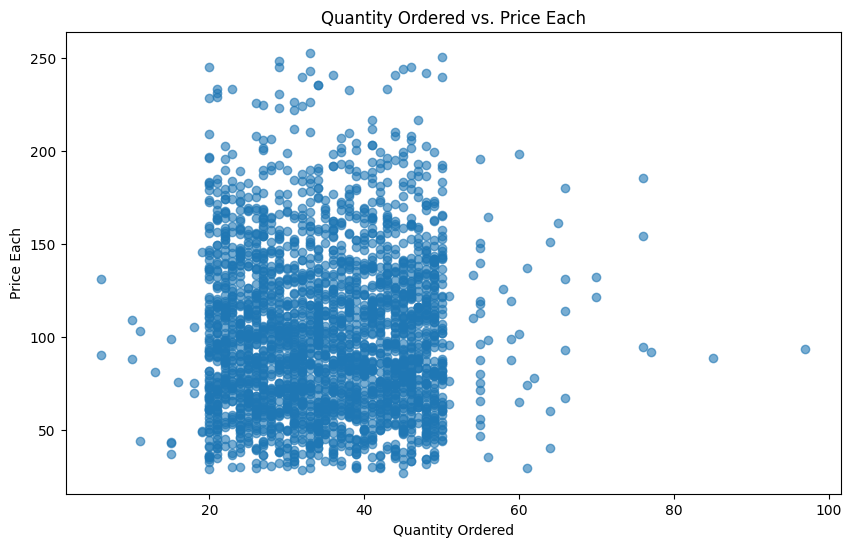

In [6]:
# Using scatter plot show relation between QUANTITYORDERED and PRICEEACH
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(Data_file['QUANTITYORDERED'], Data_file['PRICEEACH'], alpha=0.6)

plt.title('Quantity Ordered vs. Price Each')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')

plt.show()

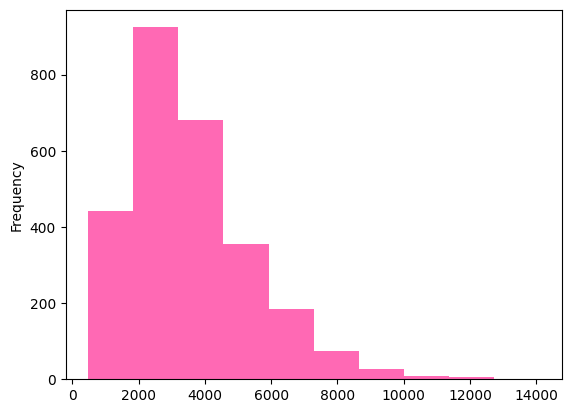

In [7]:
# Histogram
Data_file["SALES"].plot(kind = 'hist', color='hotpink')
plt.show()

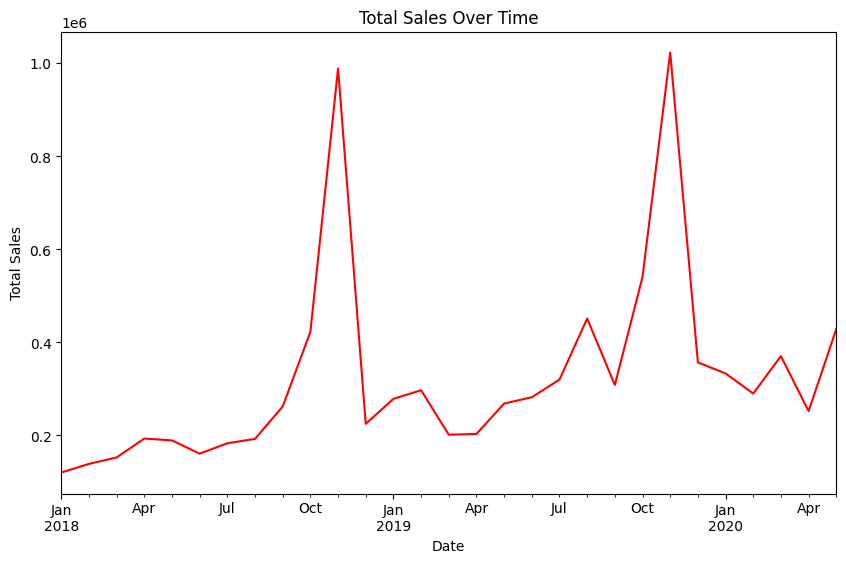

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot sales over time
plt.figure(figsize=(10, 6))
Data_file.groupby(Data_file['ORDERDATE'].dt.to_period("M"))['SALES'].sum().plot(kind='line', color='red')

plt.title('Total Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.show()

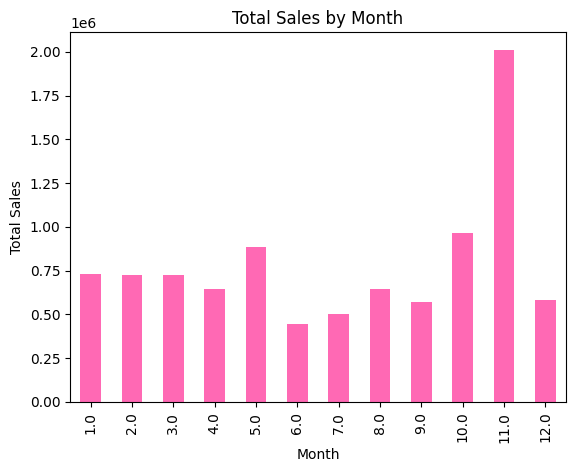

In [16]:
# Sales by Month
Data_file['Month'] = Data_file['ORDERDATE'].dt.month
Data_file.groupby('Month')['SALES'].sum().plot(kind='bar', color='hotpink')

plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()